In [1]:
import pandas as pd

data = pd.read_csv('train.tsv',delimiter="\t")
data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

In [3]:
data["boilerplate"][2]

'{"title":"Fruits that Fight the Flu fruits that fight the flu | cold & flu | men\'s health","body":"Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent heart disease and cancer Next Papayas With 250 percent of the RDA of vitamin C a papaya can help kick a cold right out of your system The beta carotene and vitamins C and E in papayas reduce inflammation throughout the body lessening the effects of asthma Next Cranberries Cranberries have more antioxidants than other common fruits and veggies One serving has five times the amount in broccoli Cranberries are a natural probiotic enhancing good bacteria levels in the gut and protecting it from foodborne illnesses Next Grapefruit Loaded with vitamin C grapefruit also contains natural compounds called limonoids which can lower cholesterol The red varieties are a potent source of the cancer fighting su

In [4]:
import json
import numpy as np

def getParam(text,param):
    boilerplate = json.loads(text)
    if param in boilerplate.keys():
        return boilerplate[param]
    else:
        return np.nan


In [5]:
getParam(data["boilerplate"][1],"title")

'The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races'

In [6]:

data["title"] = data["boilerplate"].apply(lambda x:getParam(x,"title") )
data["body"] = data["boilerplate"].apply(lambda x:getParam(x,"body") )
data["url"] = data["boilerplate"].apply(lambda x:getParam(x,"url") )

data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,bloomberg news 2010 12 23 ibm predicts hologra...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,popsci technology article 2012 07 electronic f...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,menshealth health flu fighting fruits cm mmc F...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,dumblittleman 2007 12 10 foolproof tips for be...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,bleacherreport articles 1205138 the 50 coolest...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7335 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

In [8]:
cols_with_high_missing = [col for col in data.columns if data[col].isna().mean()>0.6]
cols_with_high_missing

[]

In [9]:
cols_with_na = [col for col in data.columns if data[col].isna().sum()>0]
cols_with_na

['url', 'title', 'body']

In [10]:
from scipy.stats import kurtosis
from matplotlib import pyplot as plt

kurt = {col:kurtosis(data[col].tolist()) for col in data.columns if data[col].dtype!="object"}
kurt

{'urlid': -1.1955714263947106,
 'avglinksize': 751.024529648441,
 'commonlinkratio_1': -0.34259691345407894,
 'commonlinkratio_2': 1.1415596607021277,
 'commonlinkratio_3': 8.106927916196621,
 'commonlinkratio_4': 15.72742940006913,
 'compression_ratio': 6.856308650766497,
 'embed_ratio': 4.663042399058981,
 'framebased': -3.0,
 'frameTagRatio': 9.214596057604272,
 'hasDomainLink': 42.12360190290802,
 'html_ratio': 4.851584709114504,
 'image_ratio': 1731.6117126358947,
 'lengthyLinkDomain': -1.5416927276616772,
 'linkwordscore': 0.20197825362628397,
 'non_markup_alphanum_characters': 95.362247637254,
 'numberOfLinks': 163.40994731321382,
 'numwords_in_url': 0.5159249293277282,
 'parametrizedLinkRatio': 3.1901974465044036,
 'spelling_errors_ratio': 49.579215006242585,
 'label': -1.9971593063405098}

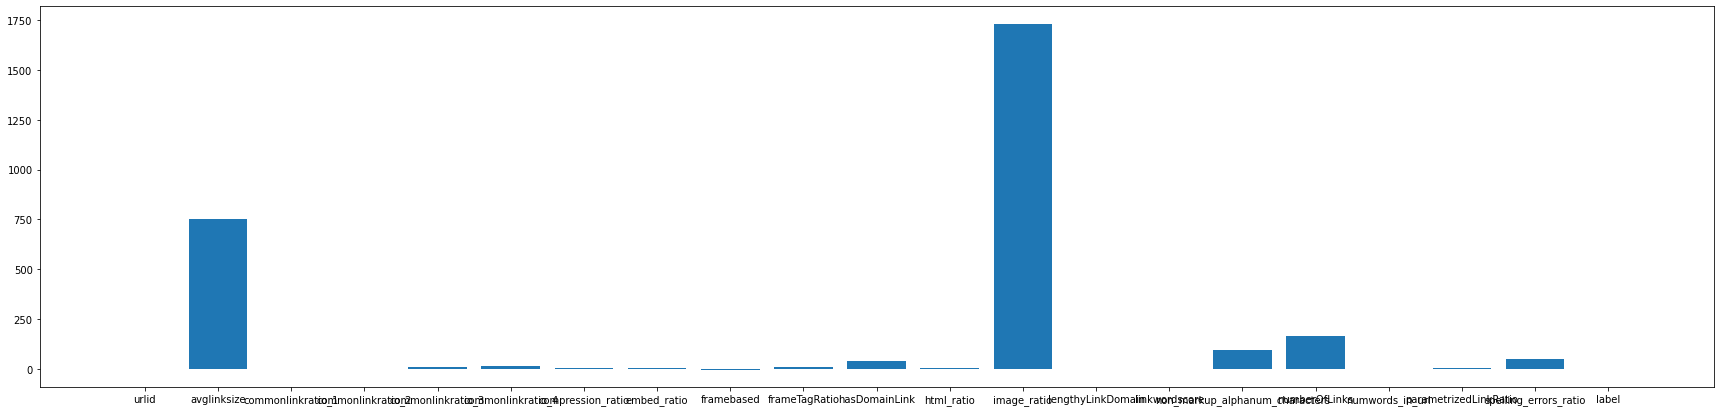

In [11]:

fig = plt.figure(figsize =(30, 7))
 
# Horizontal Bar Plot
plt.bar(kurt.keys(),kurt.values())
 
# Show Plot
plt.show()

In [12]:
# Remove Outliers with Quantile

def remove_outliers(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lb = Q3 - 1.5*Q1
    ub = Q3 + 1.5*Q1
    data[col] = np.where(data[col]<lb,lb,data[col])
    data[col] = np.where(data[col]>ub,ub,data[col])
    return data[col]


In [13]:
for col in data.columns:
    if data[col].dtype!="object":
        data[col] = remove_outliers(col)

In [14]:
kurt = [kurtosis(data[col].tolist()) for col in data.columns if data[col].dtype!="object"]
kurt

[-1.1350464520108905,
 1.2821257588077692,
 -0.6418141640978803,
 -0.42563134211920906,
 -0.506408038111346,
 -2.0,
 2.4031983572159916,
 -3.0,
 -3.0,
 -0.3853717073893539,
 -3.0,
 3.568854493618481,
 -0.6383941947930132,
 -3.0,
 -0.40056013491255893,
 -0.5232369812120083,
 -0.4727007766763278,
 -0.3727806367412585,
 -0.5512167099572509,
 1.2506367906392803,
 -3.0]

<AxesSubplot:>

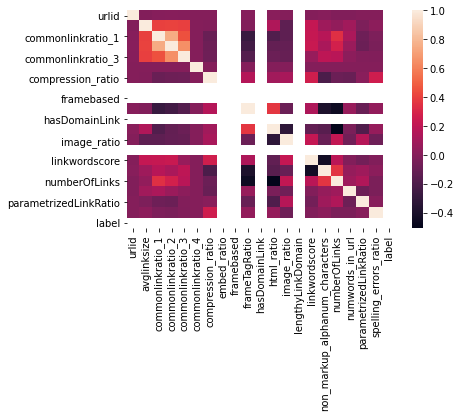

In [15]:
import seaborn as sns

sns.heatmap(data.corr())

In [16]:
for col in data.columns:
    if data[col].dtype == "object":
        print(col)

url
boilerplate
alchemy_category
alchemy_category_score
is_news
news_front_page
title
body


In [17]:
data["label"]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7390    1.0
7391    1.0
7392    1.0
7393    1.0
7394    1.0
Name: label, Length: 7395, dtype: float64

In [18]:
data["alchemy_category"].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [22]:
data["alchemy_category_score"].replace("?","0",inplace=True)

In [24]:
data["alchemy_category_score"] = data["alchemy_category_score"].astype("float")

In [25]:
data["alchemy_category"] = data["alchemy_category"].astype("category")

In [26]:
data["alchemy_category"] = data["alchemy_category"].cat.codes

In [30]:
data["alchemy_category"].dtypes

dtype('int8')

In [27]:
data["is_news"].value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

In [28]:
data["is_news"].replace("?","0",inplace=True)

In [29]:
data["is_news"] = data["is_news"].astype("category").cat.codes

In [31]:
data["is_news"].dtype

dtype('int8')

In [35]:
data["news_front_page"].value_counts()

0    5853
?    1248
1     294
Name: news_front_page, dtype: int64

In [36]:
data["news_front_page"].replace("?","0",inplace=True)
data["news_front_page"] = data["news_front_page"].astype("category").cat.codes
data["news_front_page"].dtype

dtype('int8')

In [42]:
data["hasDomainLink"].value_counts()

0.0    7395
Name: hasDomainLink, dtype: int64

In [43]:
data["non_markup_alphanum_characters"].value_counts()

4008.5    4109
8745.5    1180
5584.0       5
6433.0       5
4349.0       5
          ... 
5924.0       1
5452.0       1
8385.0       1
5405.0       1
4985.0       1
Name: non_markup_alphanum_characters, Length: 1650, dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7335 non-null   object 
 1   urlid                           7395 non-null   float64
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   int8   
 4   alchemy_category_score          7395 non-null   float64
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

In [40]:
numerical_cols = [col for col in data.columns if data[col].dtypes!="object"]
numerical_cols

['urlid',
 'alchemy_category',
 'alchemy_category_score',
 'avglinksize',
 'commonlinkratio_1',
 'commonlinkratio_2',
 'commonlinkratio_3',
 'commonlinkratio_4',
 'compression_ratio',
 'embed_ratio',
 'framebased',
 'frameTagRatio',
 'hasDomainLink',
 'html_ratio',
 'image_ratio',
 'is_news',
 'lengthyLinkDomain',
 'linkwordscore',
 'news_front_page',
 'non_markup_alphanum_characters',
 'numberOfLinks',
 'numwords_in_url',
 'parametrizedLinkRatio',
 'spelling_errors_ratio',
 'label']

In [46]:
X = data[numerical_cols].drop(["urlid","alchemy_category","is_news","hasDomainLink","label"],axis=1)
X

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,0.789131,2.055556,0.676471,0.205882,0.100000,0.065065,0.443783,0.0,0.0,0.090774,0.245831,0.197850,1.0,24.0,0,5424.0,170.0,8.0,0.179823,0.079130
1,0.574147,3.677966,0.508021,0.288770,0.166667,0.065065,0.468649,0.0,0.0,0.098707,0.203490,0.197850,1.0,40.0,0,4973.0,187.0,9.0,0.181818,0.125448
2,0.996526,2.382883,0.562016,0.321705,0.120155,0.065065,0.525448,0.0,0.0,0.072448,0.226402,0.197850,1.0,55.0,0,4008.5,258.0,11.0,0.179823,0.057613
3,0.801248,1.543103,0.400000,0.142105,0.100000,0.065065,0.480725,0.0,0.0,0.095861,0.265656,0.197850,1.0,24.0,0,4008.5,120.0,5.0,0.179823,0.100858
4,0.719157,2.676471,0.500000,0.222222,0.123457,0.065065,0.446143,0.0,0.0,0.030705,0.228887,0.197850,1.0,22.0,0,8745.5,162.0,10.0,0.179823,0.082569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,0.651067,3.010526,0.474747,0.222222,0.166667,0.065065,0.474273,0.0,0.0,0.116212,0.256669,0.197850,1.0,38.0,0,4008.5,99.0,11.0,0.179823,0.071429
7391,0.141920,2.208054,0.483333,0.246667,0.100000,0.065065,0.558184,0.0,0.0,0.057377,0.218014,0.225962,1.0,34.0,0,5672.0,300.0,4.0,0.179823,0.109453
7392,0.196273,2.000000,0.315789,0.171053,0.105263,0.065065,0.692529,0.0,0.0,0.116212,0.248388,0.275551,1.0,43.0,0,4008.5,99.0,5.0,0.302774,0.117647
7393,0.617876,1.026316,0.210526,0.142105,0.100000,0.065065,1.242152,0.0,0.0,0.097778,0.256070,0.197850,1.0,37.0,1,4008.5,99.0,2.5,0.179823,0.215485


In [50]:
import math

k = math.ceil(0.75*len(X.columns))
k

15

In [54]:
# Lets use SelectKBest and chi2 to see how feature selection works and decrese 25% of numerical columns

from sklearn.feature_selection import SelectKBest,chi2

reg = SelectKBest(chi2,k=k).fit(X,data["label"])
X_transformed = reg.transform(X)
X_transformed


array([[ 0.0650647 ,  0.44378317,  0.        , ...,  8.        ,
         0.17982314,  0.07912957],
       [ 0.0650647 ,  0.468649  ,  0.        , ...,  9.        ,
         0.18181818,  0.12544803],
       [ 0.0650647 ,  0.52544803,  0.        , ..., 11.        ,
         0.17982314,  0.05761317],
       ...,
       [ 0.0650647 ,  0.69252874,  0.        , ...,  5.        ,
         0.30277396,  0.11764706],
       [ 0.0650647 ,  1.24215154,  0.        , ...,  2.5       ,
         0.17982314,  0.21548463],
       [ 0.0650647 ,  0.43414634,  0.        , ...,  4.        ,
         0.17982314,  0.13414634]])

In [55]:
reg.get_support()[1]

False

In [56]:
selected_cols = [col for i,col in enumerate(X.columns) if reg.get_support()[i]]
selected_cols

['commonlinkratio_4',
 'compression_ratio',
 'embed_ratio',
 'framebased',
 'frameTagRatio',
 'html_ratio',
 'image_ratio',
 'lengthyLinkDomain',
 'linkwordscore',
 'news_front_page',
 'non_markup_alphanum_characters',
 'numberOfLinks',
 'numwords_in_url',
 'parametrizedLinkRatio',
 'spelling_errors_ratio']